# The Sparks Foundation : Task 3 : Exploratory Data Analysis - Retail

### Perform Exploratory Data Analysis on dataset sample superstore - as a business manager try to find out the weak areas where you can work to make profit.

### Author : Sohom Das

## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
#Importing Data
df = pd.read_csv("SampleSuperstore.csv")  #loading dataset
df.head(8)    #display top 8 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152


## Inspecting The Data

In [4]:
df.shape #Shows the data structure

(9994, 13)

There are 9994 rows and 13 columns.

In [5]:
df.columns #Shows the heads of the columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.isnull().any() #Checking for Null-Values

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [8]:
df.describe()  #Shows Descriptive Statistics

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Here we can see the basic statistics: count of dataset, its mean, standard deviation, percentiles and max value.


## Visualizing The Dataset

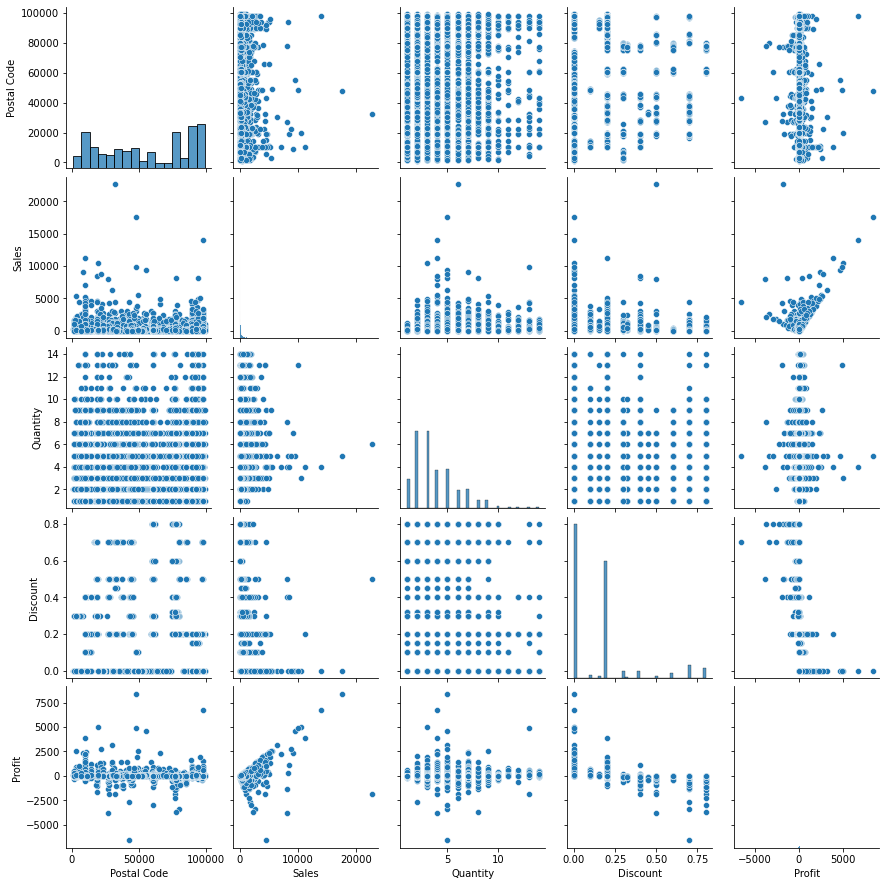

In [11]:
sns.pairplot(df)

### Dropping Duplicate Values

In [13]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

<AxesSubplot:>

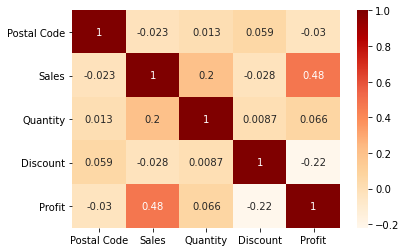

In [16]:
#Heatmap to show correlation between each variable:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='OrRd')

In [17]:
df = df.drop(['Postal Code'],axis = 1)    #Drop postal code column

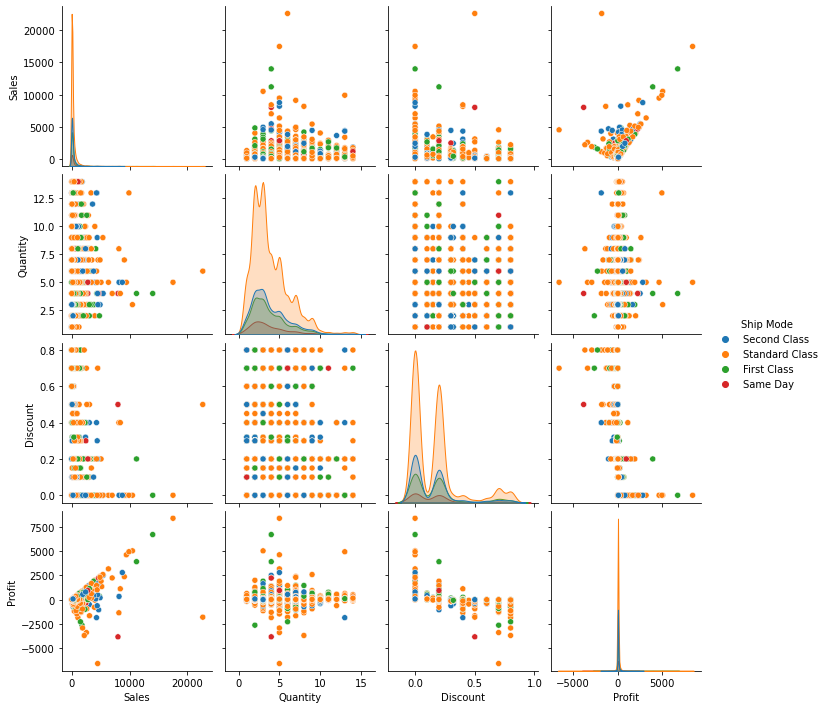

In [18]:
sns.pairplot(df, hue = 'Ship Mode')

In [19]:
df['Ship Mode'].value_counts()   #value count for shipping mode

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

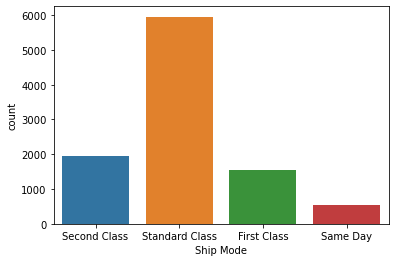

In [20]:
sns.countplot(x=df['Ship Mode'])

In [21]:
df['Segment'].value_counts()   #valuecount for segments

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

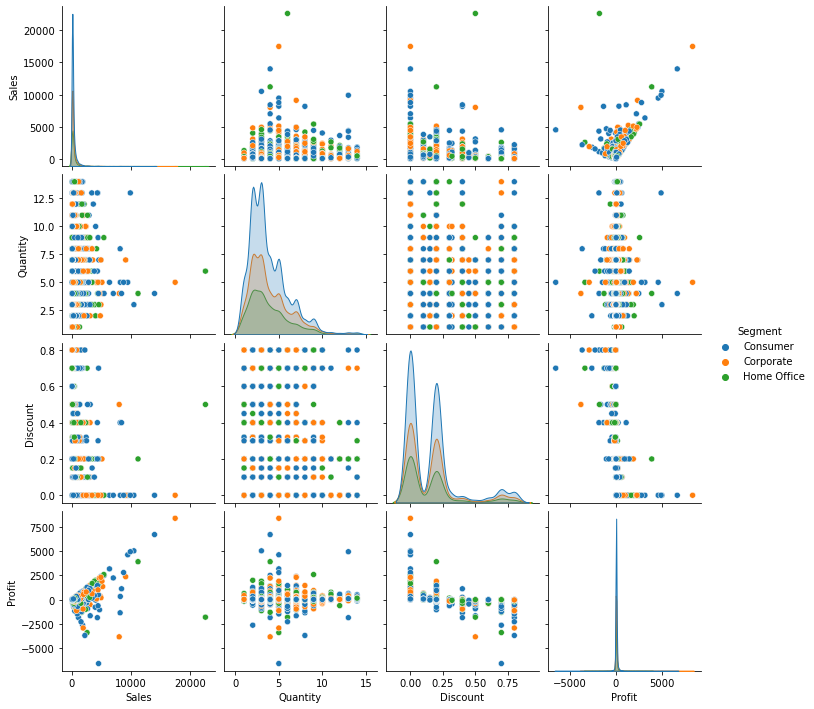

In [22]:
sns.pairplot(df,hue = 'Segment')     #plot the values for segments on chart

<AxesSubplot:xlabel='Segment', ylabel='count'>

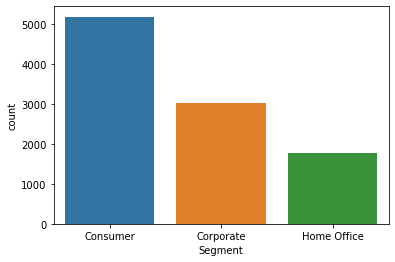

In [23]:
sns.countplot(x = 'Segment',data = df, palette = 'tab10')

In [24]:
df['Category'].value_counts()     #Counts the values for each category

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

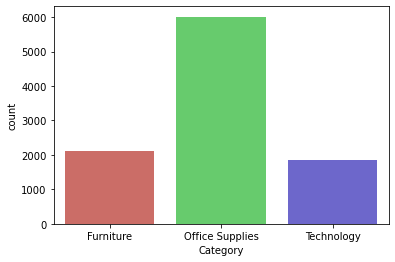

In [25]:
sns.countplot(x='Category',data=df,palette='hls')    #Plotting the above category data on chart

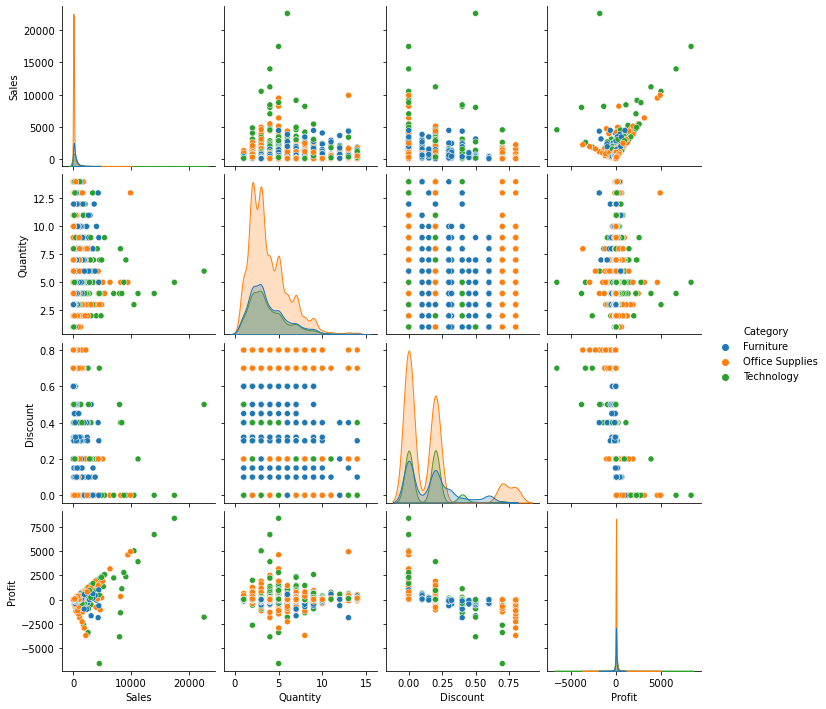

In [26]:
sns.pairplot(df,hue='Category')

In [27]:
df['Sub-Category'].value_counts()    #Counts the individual values of different Sub-Categories

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

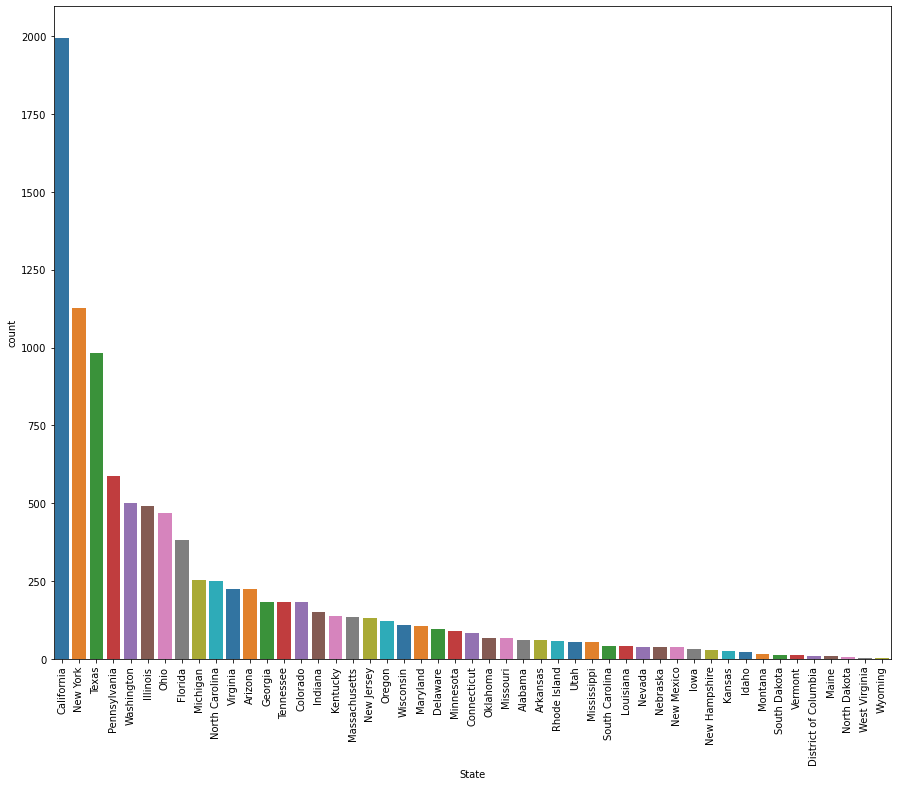

In [28]:
#Plotting the above values on a bar chart
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='tab10',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

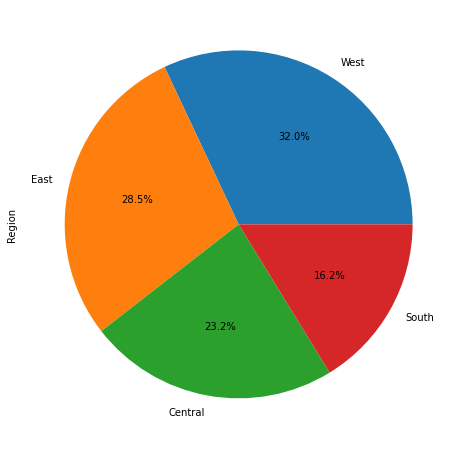

In [30]:
#Plotting the values in accordance with sub-region: East, West, Central & South
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

<AxesSubplot:ylabel='Category'>

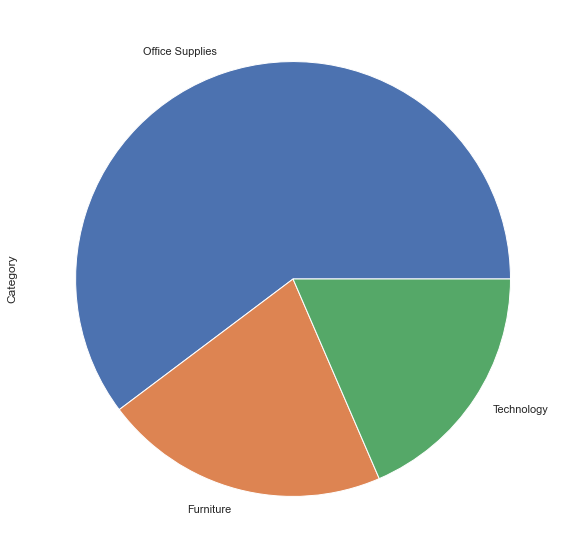

In [32]:
sns.set(rc={'figure.figsize':(10,10)})
df['Category'].value_counts().plot.pie()

<AxesSubplot:ylabel='Sub-Category'>

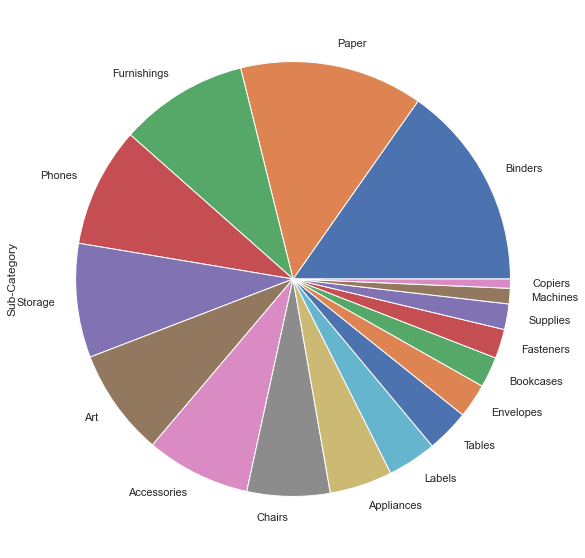

In [34]:
sns.set(rc={'figure.figsize':(10,10)})
df['Sub-Category'].value_counts().plot.pie()

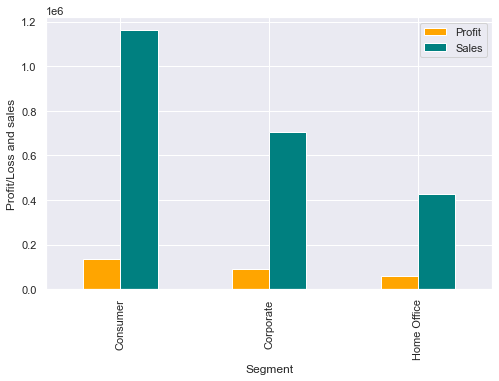

In [42]:
#Plotting the sales and profit for each segment
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['orange','teal'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

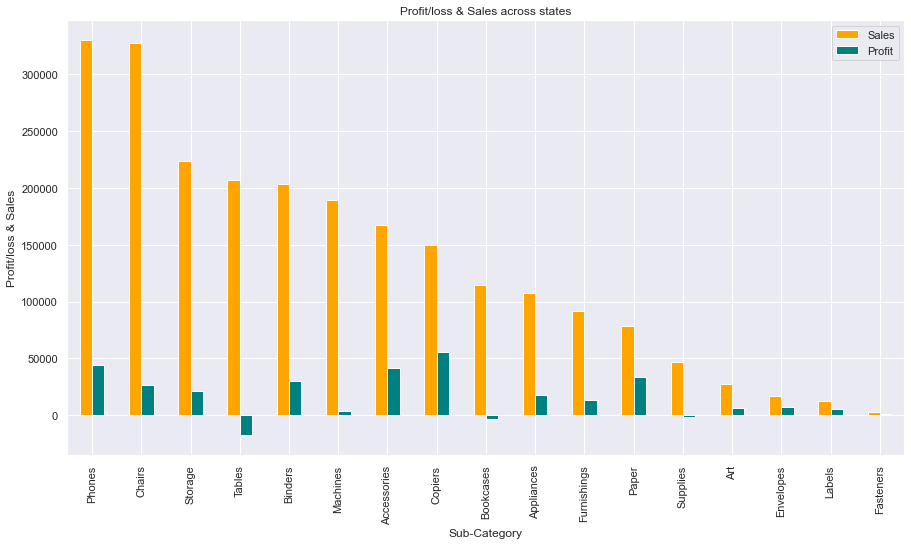

In [41]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['orange','teal'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

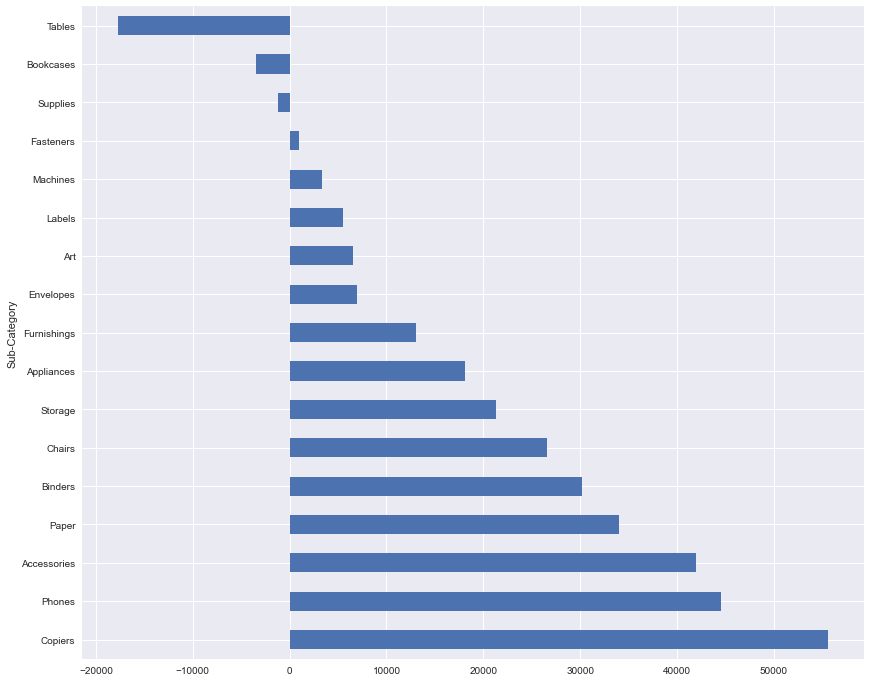

In [6]:
# A more detailed view
plt.figure(figsize=(14,12))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh() # h for horizontal

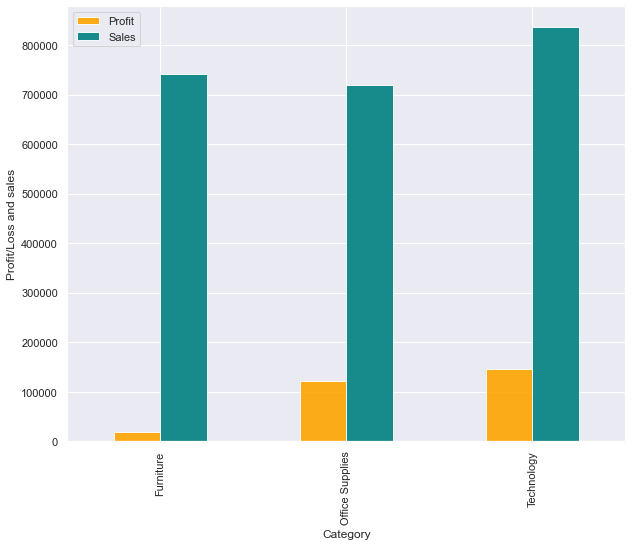

In [44]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['orange','teal'],alpha=0.9,figsize=(10,8))
plt.ylabel('Profit/Loss and sales')
plt.show()

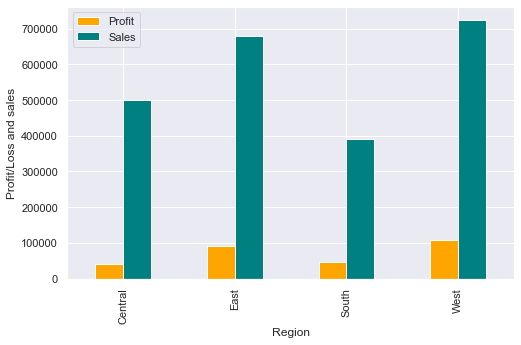

In [45]:
#Plotting Profit and Sales distribution, region-wise 
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['orange','teal'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

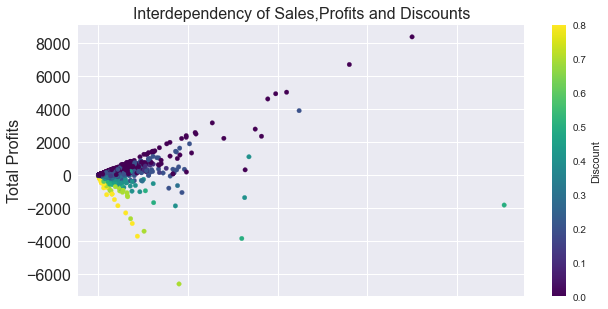

In [5]:
plt.style.use('seaborn')
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

The graph clearly shows that if we give more Discount on our products sales increases but profit decreases.



## Observations:

 - Phones category has the highest sales
 - Tables and Bookcases category are facing losses.
 - Envelopes, Labels and Fastners contribute the least towards sales and profit.
 - California, New York, Washington have high profits.
 - Maximum number of buyers are from California, New York and Texas.